In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from augmentation import load_augmented
from helpers import read_mnist, format_data, iterate_minibatches, split_data, accuracy, dump_nn, load_nn
from nn import NeuralNetwork

# Read data

In [2]:
ims, labels, a, t = read_mnist()

In [3]:
ims_aug, labels_aug = load_augmented()

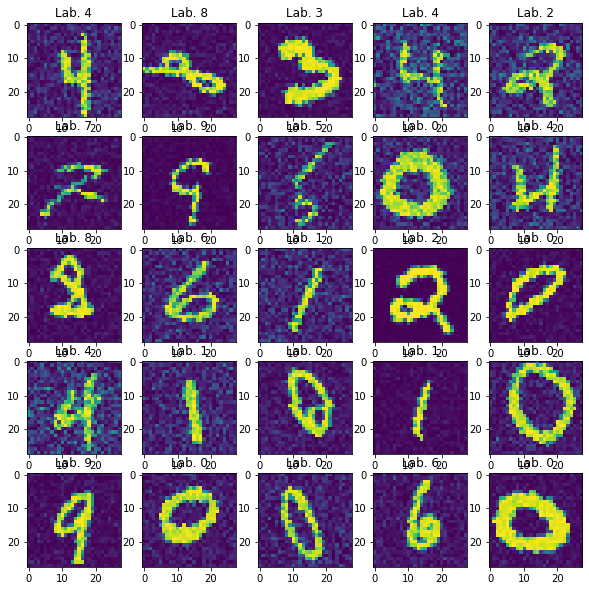

In [4]:
# Show augmented data.
fig, ax = plt.subplots(5,5,figsize=(10,10))
ax = ax.ravel()
for i in range(0,25):
    ax[i].imshow(ims_aug[i])
    ax[i].set_title(f'Lab. {labels_aug[i]}')
plt.show()

In [5]:
X, y = format_data(ims, labels)
X_aug, y_aug = format_data(ims, labels)

In [6]:
X_train, y_train, X_val, y_val = split_data(X, y, percentage=80)

In [7]:
# Add augmented data to training.
X_train = np.append(X_train, X_aug, axis=0)
y_train = np.append(y_train, y_aug, axis=0)

## Training

In [5]:
nn = NeuralNetwork(layers=[784, 400, 200, 10], momentum=0.9)
#nn = NeuralNetwork(layers=[784, 2500, 2000, 1500, 1000, 500, 10], momentum=0.9))
#nn = NeuralNetwork(layers=[784, 10], momentum=0.9))

In [6]:
from tqdm import tqdm

def train(X_train, y_train, X_val, y_val, epochs, batch_size, momentum=0.9):
    """Training loop."""
     
    accuracy_train = []
    accuracy_val = []
    
    t = tqdm(range(epochs), leave=False)
    for i in t:
        # Iterate over minibatches (backward includes both forward and backward step).
        for batch in iterate_minibatches(X_train, y_train, batch_size):
            x_batch, y_batch = batch
            nn.backward(x_batch, y_batch, momentum=momentum)

        # Train accuracy.
        yhat_train, _, _ = nn.forward(X_train)
        acc_train = accuracy(yhat_train, y_train)
        accuracy_train.append(acc_train)

        # Validation accuracy.
        yhat_val, _, _ = nn.forward(X_val)
        acc_val = accuracy(yhat_val, y_val)
        accuracy_val.append(acc_val)

        t.set_description("Train acc.:{:.2f}, Val acc.:{:.2f}".format(acc_train, acc_val))

    return accuracy_train, accuracy_val

In [7]:
epochs = 200
batch_size = 200

accuracy_train, accuracy_val = train(X_train, y_train, X_val, y_val, epochs, batch_size)

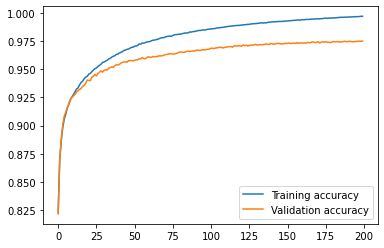

In [12]:
plt.figure()
plt.plot(accuracy_train, label="Training accuracy")
plt.plot(accuracy_val, label="Validation accuracy")
plt.legend()
plt.show()

## Dump network to file

In [13]:
dump_nn(nn, 'models/small_nn_97.pkl')

## Test dumped network works

In [10]:
best_nn = load_nn('models/small_nn_97.pkl')

In [11]:
# Validation accuracy.
yhat_val, _, _ = best_nn.forward(X_val)
print('Validation accuracy:', accuracy(yhat_val, y_val))

Validation accuracy: 0.9749166666666667
